C:\Users\Dario\AppData\Local\Temp\ipykernel_14036\1388581965.py:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([x,x_tilde,dx_max,dx_obs])


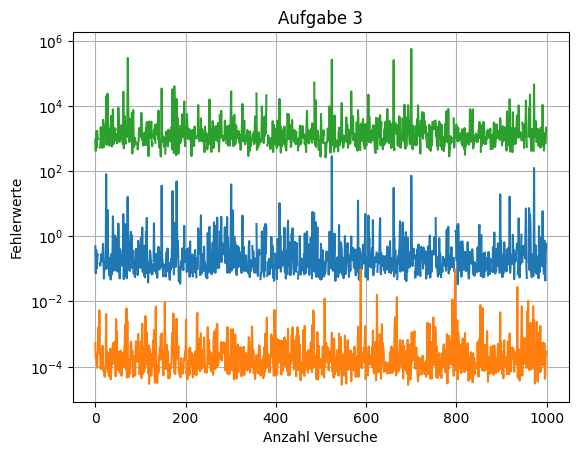

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import sys

def matrix_solver(n, A, b):
    # Making numpy array of n size and initializing
    # to zero for storing solution vector
    x = np.zeros(n)

    # Append vector b to matrix A
    A = np.c_[A, b]

    # Applying Gauss Elimination
    for i in range(n):
        if A[i][i] == 0.0:
            sys.exit('Divide by zero detected!')

        for j in range(i+1, n):
            ratio = A[j][i] / A[i][i]

            for k in range(n+1):
                A[j][k] = A[j][k] - ratio * A[i][k]

    # Back Substitution
    x[n-1] = A[n - 1][n] / A[n - 1][n - 1]

    for i in range(n-2,-1,-1):
        x[i] = A[i][n]

        for j in range(i+1,n):
            x[i] = x[i] - A[i][j] * x[j]

        x[i] = x[i] / A[i][i]

    return x

def calculateNorm(A):
    m = np.shape(A)[0]
    A_norm = 0.0
    for i in range(0,m):
        column = A[i]
        column_max = 0
        if column.size > 1:
            n = np.shape(column)[0]
            for j in range(0,n):
                column_max = column_max + np.absolute(column[j])
        else:
            column_max = np.absolute(column)

        if column_max > A_norm:
            A_norm = column_max

    return A_norm

def calculateCond(A):
    A_inv = np.linalg.inv(A)
    return calculateNorm(A) * calculateNorm(A_inv)

def calculateDxMax(A, A_tilde, b, b_tilde):
    A_cond = calculateCond(A)
    A_norm = calculateNorm(A)
    b_norm = calculateNorm(b)

    A_minus_A_tilde_norm = calculateNorm(np.subtract(A,A_tilde))
    b_minus_b_tilde_norm = calculateNorm(np.subtract(b,b_tilde))

    if (A_cond * (A_minus_A_tilde_norm/A_norm)) >= 1:
        return np.nan

    dx_max =  (A_cond / (1 - (A_cond * (A_minus_A_tilde_norm/A_norm)))) * \
              ((A_minus_A_tilde_norm/A_norm) + (b_minus_b_tilde_norm/b_norm))

    return dx_max

def calculateDxObs(x, x_tilde):
    x_norm = calculateNorm(x)

    x_minus_x_tilde_norm = calculateNorm(np.subtract(x,x_tilde))

    dx_obs = x_minus_x_tilde_norm / x_norm

    return dx_obs

def calculate(n, A, A_tilde, b, b_tilde):
    dx_max = calculateDxMax(A, A_tilde, b, b_tilde)

    x = matrix_solver(n, A, b)
    x_tilde = matrix_solver(n, A_tilde, b_tilde)

    dx_obs = calculateDxObs(x, x_tilde)
    return np.array([x,x_tilde,dx_max,dx_obs])

n = 1000
dxmax_array = np.empty((n, 1))
dxobs_array = np.empty((n, 1))
dxdiff_array = np.empty((n, 1))
for i in range(n):
    # prepare
    A = np.random.random((100, 100))
    b = np.random.random((100, 1))
    A_tilde = A + np.random.random((100, 100))/10**5
    b_tilde = b + np.random.random((100, 1))/10**5

    # act
    x,x_tilde,dxmax,dxobs = calculate(100,A,A_tilde,b,b_tilde)
    dxmax_array[i] = np.array([dxmax])
    dxobs_array[i] = np.array([dxobs])
    dxdiff_array[i] = np.array([float(dxmax) / float(dxobs)])

# assert
plt.semilogy(dxmax_array)
plt.semilogy(dxobs_array)
plt.semilogy(dxdiff_array)

# Display grid
plt.grid()

# Provide the title for the semilogy plot
plt.title('Aufgabe 3')

# Give x axis label for the semilogy plot
plt.xlabel('Anzahl Versuche')

# Give y axis label for the semilogy plot
plt.ylabel('Fehlerwerte')

# Display the semilogy plot
plt.show()


# Unsere Erkenntnisse sind: Es ist eine realistische obere Schranke, aber keine genaue.
# Weil wir die Funktionen von hand entwickelt haben ist es nicht performant. Deswegen legen wir noch ein Bild von der Auswertung in das Zip-File.